In [1]:
# Chapter 4: From Linear Regression to Logistic Regression

# Spam filtering example using logistic regression
import pandas as pd
df = pd.read_csv('SMSSpamCollection', delimiter='\t', header=None)
print(df.head())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [2]:
print('Number of spam messages:', df[df[0] == 'spam'][0].count())
print('Number of ham messages:', df[df[0] == 'ham'][0].count())

Number of spam messages: 747
Number of ham messages: 4825


In [3]:
# Make some predictions
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
predictions = classifier.predict(X_test)

In [5]:
for prediction in zip(predictions[:10], X_test_raw[:10]):
    print('Prediction: {} Message: {}'.format(prediction[0], prediction[1]))

Prediction: ham Message: That sucks. So what do you got planned for your yo valentine? I am your yo valentine aren't I?
Prediction: ham Message: I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
Prediction: ham Message: When are you guys leaving?
Prediction: ham Message: Dear where you will be when i reach there
Prediction: spam Message: Dear Voucher Holder, To claim this weeks offer, at you PC please go to http://www.e-tlp.co.uk/expressoffer Ts&Cs apply. To stop texts, txt STOP to 80062
Prediction: ham Message: Did he say how fantastic I am by any chance, or anything need a bigger life lift as losing the will 2 live, do you think I would be the first person 2 die from N V Q? 
Prediction: ham Message: U so lousy, run already come back then half dead... Hee...
Prediction: spam Message: December only! Had your mobile 11mths+? You are entitled 

[[4 1]
 [2 3]]


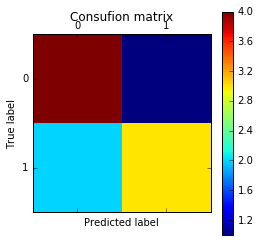

In [6]:
# Performance of model, basic example using confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Consufion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [7]:
# Compute accuracy for the sms logistic regression model
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print(np.mean(scores), scores)

0.957646308796 [ 0.9557945   0.95933014  0.95574163  0.94730539  0.97005988]


In [8]:
# Precision and Recall performance metrics

#precisions = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
#print('Precisions', np.mean(precisions), precisions)
#recalls = cross_val_score(classifier, X_train, y_train, cv=5,scoring='recall')
#print('Recalls', np.mean(recalls), recalls)

In [10]:
# F1 performance metric
#f1s = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')

In [29]:
# Grid search example
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
pipeline = Pipeline([
 ('vect', TfidfVectorizer(stop_words='english')), ('clf', LogisticRegression())])
parameters = {
'vect__max_df': (0.25, 0.5, 0.75),
'vect__stop_words': ('english', None),
'vect__max_features': (2500, 5000, 10000, None),
'vect__ngram_range': ((1, 1), (1, 2)),
'vect__use_idf': (True, False),
'vect__norm': ('l1', 'l2'),
'clf__penalty': ('l1', 'l2'),
'clf__C': (0.01, 0.1, 1, 10),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)
df = pd.read_csv('SMSSpamCollection.txt', delimiter='\t')
X, y, = df['message'], df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y)
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t{}: {}'.format(param_name, best_parameters[param_name]))
predictions = grid_search.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions))
print('Recall:', recall_score(y_test, predictions))

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 4608 out of 4608 | elapsed:  9.9min finished


Fitting 3 folds for each of 1536 candidates, totalling 4608 fits
Best score: 0.9834928229665072
Best parameters set:
	clf__C: 10
	clf__penalty: l2
	vect__max_df: 0.5
	vect__max_features: None
	vect__ngram_range: (1, 2)
	vect__norm: l2
	vect__stop_words: None
	vect__use_idf: True
Accuracy: 0.986370157819


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:978: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(['ham', 'spam'], 
      dtype='<U4')